Fen : 

#Title : Houndstooth

#Inspiration : Houndstooth, hounds tooth check or hound's tooth (and similar spellings), also known as dogstooth, dogtooth, dog's tooth, or pied-de-poule, is a duotone textile pattern characterized by broken checks or abstract four-pointed shapes, often in black and white, although other colours are used. The classic houndstooth pattern is an example of a tessellation.
https://en.wikipedia.org/wiki/Houndstooth#/media/File:Houndstooth.jpg
-Wikipedia

#Method : I try to com
plex the original script from the class. You can see an unit of houndstooth is combined by 3 shapes, it's simple but after using move, rotate, random function, the whole image becomes vivid.


In [1]:
import matplotlib.pyplot as plt
import math
import random
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
from scipy.optimize import curve_fit
import ipywidgets as widgets

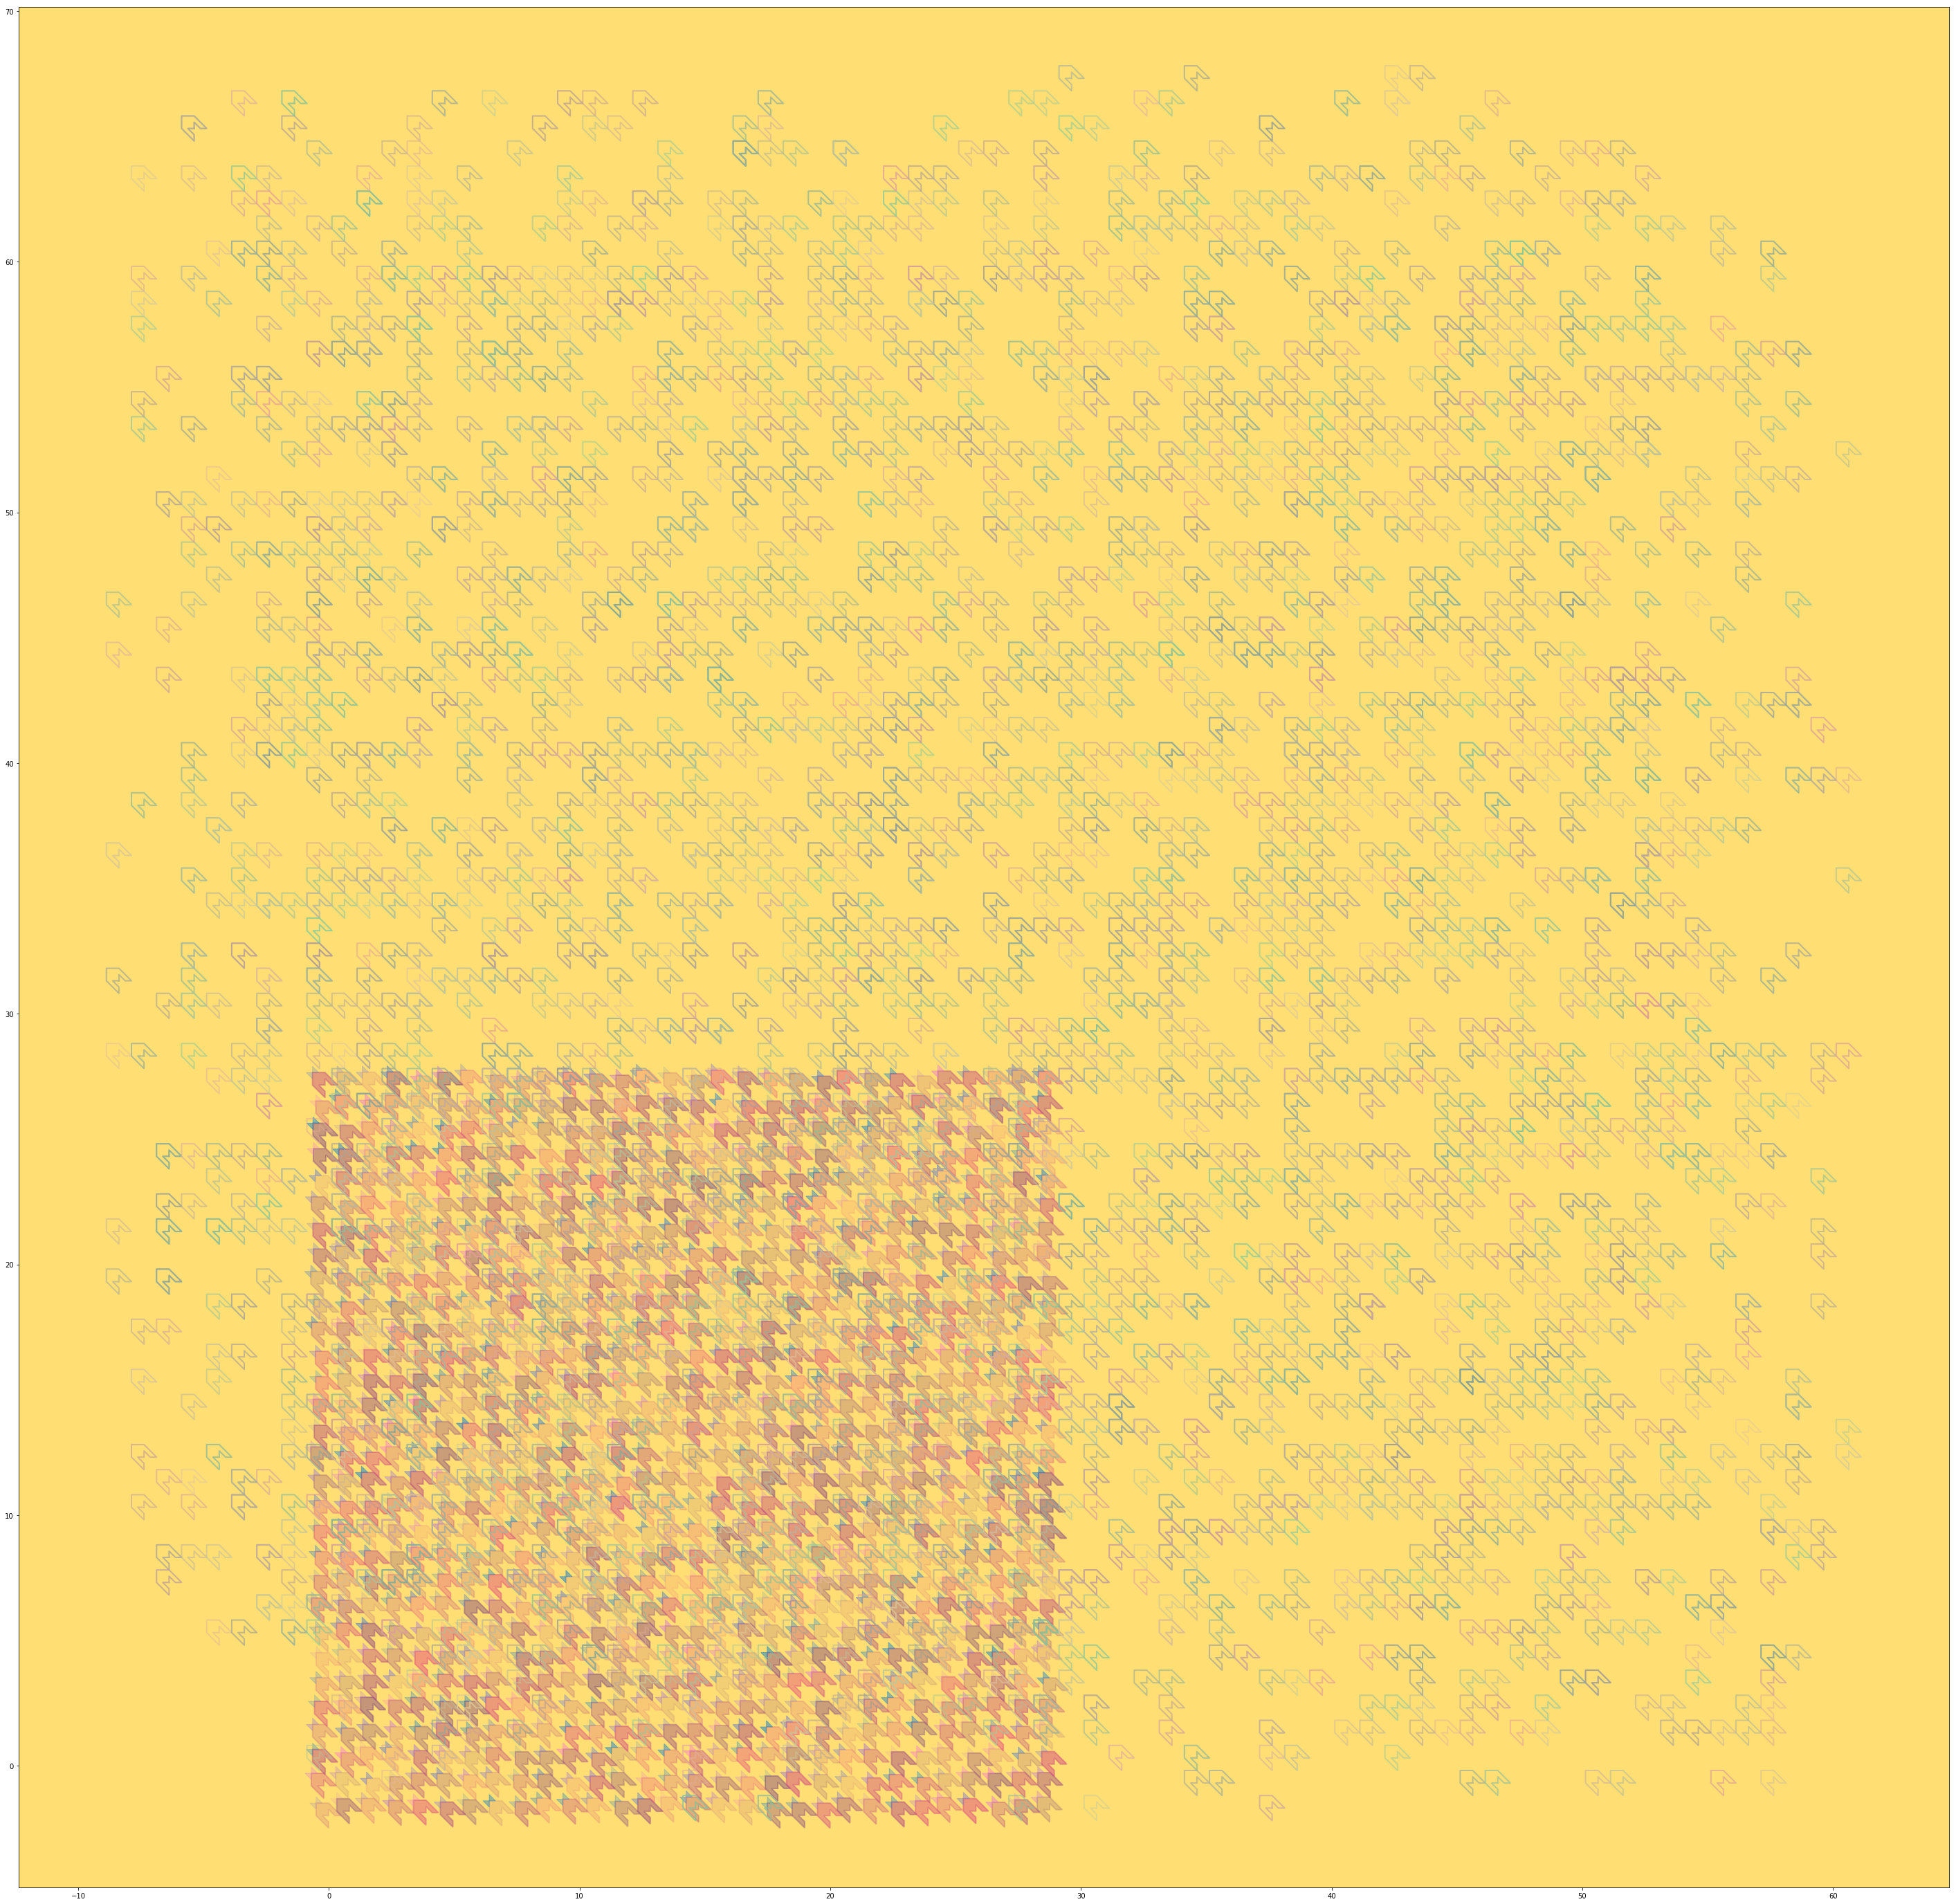

In [2]:
class Hounds(object):

    def __init__(self, x0, y0, p ):

        self.x0 = x0
        self.y0 = y0
        
        self.x1 = x0+p
        self.y1 = y0
        
        self.x2 = x0
        self.y2 = y0-p
        
        self.x3 = x0
        self.y3 = y0-2*p
        
        self.x4 = x0+2*p
        self.y4 = y0
        
        self.x5 = x0+2*p
        self.y5 = y0+2*p
        
        self.x6 = x0
        self.y6 = y0+2*p
        
        self.x7 = x0-2*p
        self.y7 = y0
        
        self.x8 = x0-p
        self.y8 = y0
        
        self.x9 = x0
        self.y9 = y0+p
        
# for triangles

        self.x10 = x0+p
        self.y10 = y0+2*p
        
        self.x11 = x0+3*p
        self.y11 = y0+2*p
        
        self.x12 = x0+2*p
        self.y12 = y0+p
        
        self.x13 = x0+2*p
        self.y13 = y0+3*p
        
#-----------------------------center points
        self.cx = x0+1
        self.cy = y0-1
#-----------------------------image lists
        self.xbody  = [self.x0, self.x1, self.x2, self.x3, self.x4, self.x5, self.x6, self.x7, self.x8, self.x9]
        self.ybody  = [self.y0, self.y1, self.y2, self.y3, self.y4, self.y5, self.y6, self.y7, self.y8, self.y9]
        
        self.xtr = [self.x10, self.x11, self.x12, self.y13]
        self.ytr = [self.y10, self.y11, self.y12, self.y13]

        self.xall = [self.x0, self.x1, self.x2, self.x3, self.x4, self.x5, self.x6, self.x7, self.x8, self.x9, self.x10,
                     self.x11, self.x12, self.x13]
        self.yall = [self.y0, self.y1, self.y2, self.y3, self.y4, self.y5, self.y6, self.y7, self.y8, self.y9, self.y10, 
                     self.y11, self.y12, self.y13]
#-----------------------------outline
        self.xoutline = [self.x0, self.x1, self.x2, self.x3, self.x4, self.x5, self.x6, self.x7, self.x8, self.x9, self.x0]
        self.youtline = [self.y0, self.y1, self.y2, self.y3, self.y4, self.y5, self.y6, self.y7, self.y8, self.y9, self.y0]

    def rotate(self, angle):

        s = math.sin(angle)
        c = math.cos(angle)

        newX = []#body
        newY = []#body

        for x,y in zip(self.xall, self.yall):
            #move the point to origin
            x -= self.cx #x = x - self.cx <中心的x值
            y -= self.cy #y = y - self.cy <中心的y值
            #rotate
            xnew = x*c - y*s
            ynew = x*s + y*c
            #move back
            x = xnew + self.cx
            y = ynew + self.cy

            newX.append(x)
            newY.append(y)

        self.xall = newX
        self.yall = newY
        
        self.xbody = self.xall[0:10]
        self.ybody = self.yall[0:10]
        
        self.xtr = self.xall[10:14]
        self.ytr = self.yall[10:14]
        
        self.xoutline = newX[0:10]
        self.xoutline.append(self.xoutline[0])
        self.youtline = newY[0:10]
        self.youtline.append(self.youtline[0])
        
    def move(self, _x, _y):
        # _x, _y represent the moving vector
        newX = []
        newY = []

        for x,y in zip(self.xall, self.yall):
            x -= _x
            y -= _y

            newX.append(x)
            newY.append(y)

        self.xall = newX
        self.yall = newY

        self.xbody = self.xall[0:10]
        self.ybody = self.yall[0:10]
        
        self.xtr = self.xall[10:14]
        self.ytr = self.yall[10:14]
        
        self.xoutline = newX[0:10]
        self.xoutline.append(self.xoutline[0])
        self.youtline = newY[0:10]
        self.youtline.append(self.youtline[0])

    def display_body(self, colorv):
        plt.axis ("equal")
        plt.fill (self.xbody, self.ybody, c = colorv, linewidth = 2)
        
    def display_bodyoutline(self, colorv):
        plt.axis ("equal")
        plt.plot (self.xoutline, self.youtline, c =colorv, linewidth = 2)

    def display_tri(self, colorv):
        plt.axis ("equal")
        plt.fill (self.xtr, self.ytr, c = colorv, linewidth = 1)


# #figure size
fig = plt.figure (figsize = (50,50))

#set the limits of axis
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor((1, 0.87, 0.45))

body = []
tri = []
outline = []
gap   = 0.125

for x in range(30):
    for y in range(30):
        
        r = Hounds(x, y, 2*gap)
        r.rotate(math.radians(90))
        distance = random.uniform (0,2*gap) 
        r.move(distance, -distance) 
        body.append(r)
        tri.append(r)
        
for x in range(60):
    for y in range(60):
        
        r = Hounds(x+1*gap, y+2.5*gap, 2*gap)
        r.rotate(math.radians(90))
        distance = random.randint (0,10) 
        r.move(distance-12*gap, -distance)
        outline.append(r)
        
        
for c1 in body:
    
    ct1 = [random.uniform(0.5,0.9),
         0.3,
         0.5,
         random.uniform(0.1,0.5)]
    
    c1.display_body(ct1)
    
for c2 in tri:
    
    ct2 = [random.uniform(0,1),
         0.5,
         0.8,
         random.uniform(0.1,0.5)]
    
    c2.display_tri(ct2)
    
for c1 in outline:

    ct1 = [random.uniform(0.5,0.9),
         random.uniform(0.6,0.8),
         0.6,
         random.uniform(0.5,0.8)]

    c1.display_bodyoutline(ct1)

    
